## Life expectancy and GDP by country

## Project Purpose

The purpose of this project is to analyze and visualize the relationship between life expectancy and GDP (Gross Domestic Product) for six countries ('Chile', 'China', 'Germany', 'Mexico', 'United States' and 'Zimbabwe') over a period of time (2000 to 2015). The project aims to explore how changes in GDP impact life expectancy and vice versa. By examining the data and creating visualizations, we can gain insights into the trends and patterns of these two factors and understand their correlation (if there is one).

The project involves importing and manipulating data using pandas, visualizing the data using matplotlib and seaborn libraries, and generating various plots such as bar plots, scatter plots, and line plots. Through these visualizations, we can identify countries with high life expectancy and GDP, observe the changes in these factors over the years, and compare the performance.

**This project seeks to answer some important questions:**
* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?
* What is the distribution of that life expectancy?

### Import python modules for data manipulation and visualization

In [1]:
#import libraries for data manipulation
import pandas as pd
import numpy as np

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#open csv file
gdp_data = pd.read_csv('all_data.csv')

#preview first rows
gdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We can notice that the first column **(Country)** represents the countries 
present in the dataset, the second column **(Year)** represents the years we have information of, the 
third column is the **life expectancy in years** for each country and the **(GDP)** column
represent the **Gross domestic product for each country**.

In [3]:
# rename columns, the column 'Life expectancy at birth (years)' is too long,
# so we will rename it to 'Life Expectancy' to make it easier to work with

gdp_data.rename(columns={
    'Life expectancy at birth (years)':'Life Expectancy'
}, 
inplace=True)

In [4]:
# verify changes by previewing first rows
gdp_data.head()

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
# check data types
gdp_data.dtypes

Country             object
Year                 int64
Life Expectancy    float64
GDP                float64
dtype: object

In [6]:
# display different countries
gdp_data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [7]:
# display how many data points are for each country
gdp_data.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [8]:
# display count of years, to see if we have the same number of data points for
# each year
gdp_data.Year.value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In [9]:
# look for null values
gdp_data.isna().sum()

Country            0
Year               0
Life Expectancy    0
GDP                0
dtype: int64

In [11]:
gdp_data.describe()

,Year,Life Expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### Data exploration and visualization

First we will explore Life Expectancy distribution.

<Figure size 800x600 with 0 Axes>

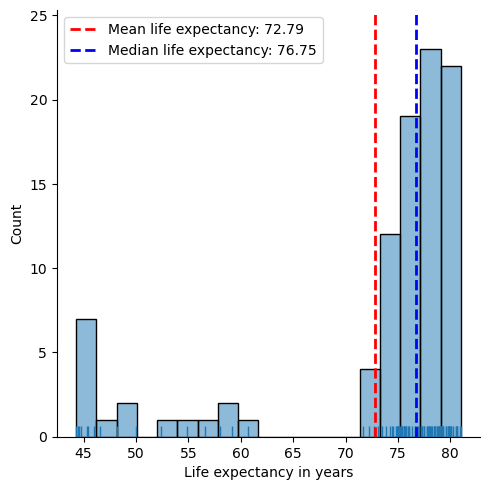

In [28]:
# calculate mean and median of life expectancy to plot them on the histogram
mean_value = gdp_data['Life Expectancy'].mean()
median_value = gdp_data['Life Expectancy'].median()


plt.figure(figsize=(8,6))
sns.displot(gdp_data['Life Expectancy'], rug = True, kde=False, alpha=0.5)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean life expectancy: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median life expectancy: {median_value:.2f}')
plt.xlabel("Life expectancy in years")
plt.legend();

From the above histogram we can infer that the life expectancy is mostly distributed in the Right side of the Histogram (Left-skewed), this means that the average life expectancy could be from 70 to 80 years, we will explore this in more detail in the next graphics.

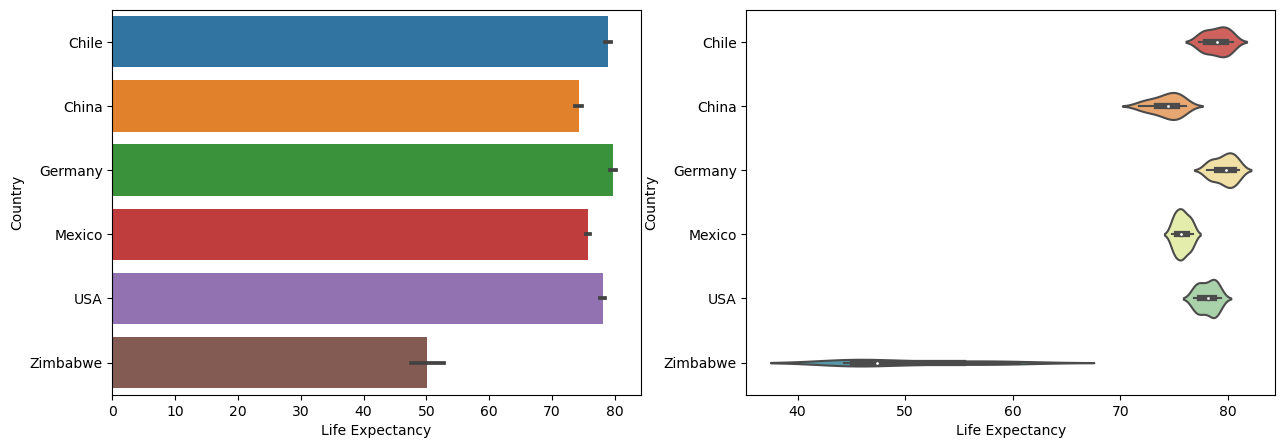

In [13]:
# Life Expectancy for each country

# create labels so the names of the countries are easier to read
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

# create a bar plot to display the life expectancy for each country
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.barplot(x="Life Expectancy", y="Country", data=gdp_data)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# create a violin plot to display the life expectancy for each country
plt.subplot(1,2,2)
ax = sns.violinplot(x='Life Expectancy', y='Country', data=gdp_data, palette='Spectral')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
plt.show()

The violin plot in Figure 2 shows the life expectancy in years for six countries. The countries with the highest life expectancy are Germany, the United States, and Chile, where Life expectancy is distributed mainly between 70 and 80 years, this means that the average life expectancy is well distributed and doesn't vary much for all countries except for Zimbabwe, which has an average life expectancy of around 50 years.

Now that we have an idea of the life expectancy by country we can verify if there is a relationship between GDP and Life expectancy using a scatterplot

In [28]:
def readable_numbers(x, pos):
  """Takes a large number and formats it into K, M, B, T to make it more readable.
      (200k, 1M, 3.5B, 2T)"""
  if x >= 1e12:
    s = '{:1.2f}T'.format(x * 1e-12)  
  elif x >= 1e9:
    s = '{:1.2f}B'.format(x * 1e-9)  
  elif x >= 1e6:
        s = '{:1.1f}M'.format(x * 1e-6)
  elif x >= 1e3:
    s = '{:1.0f}K'.format(x * 1e-3)
  else:
    s = '{:1.0f}'.format(x)
  return s


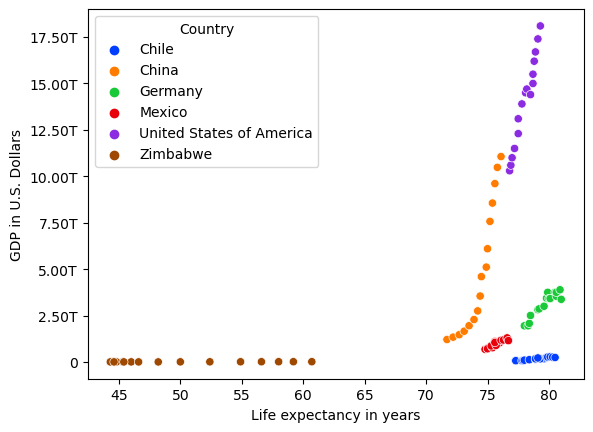

In [29]:
# GDP compared to Life expectancy by country

ax = sns.scatterplot(data=gdp_data, x='Life Expectancy', y='GDP', hue='Country',
                     palette='bright')
# calls function to format GDP label in Trillions of Dollars
ax.yaxis.set_major_formatter(readable_numbers)
ax.set(ylabel="GDP in U.S. Dollars")
plt.xlabel('Life expectancy in years')
plt.show()

In general one can see an increase in GDP and life expectancy, exhibiting a positive correlation. To better demonstrate this correlation we can plot a FacetGrid for each country.

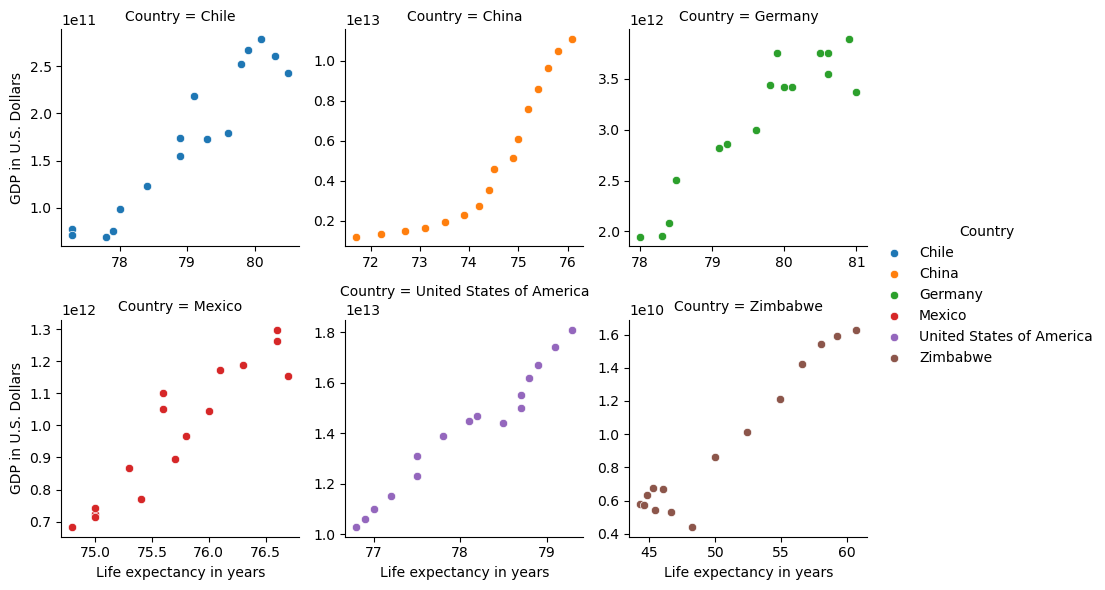

In [25]:
# col_wrap=3 limits the number of subplots in each row of the grid to 3.
# sharey=False and sharex=False arguments NOT to share the y-axis and x-axis 
# scales between the subplots. 
graph = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,            
                      hue = "Country", sharey= False, sharex= False)

graph = (graph.map(sns.scatterplot,"Life Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy in years", "GDP in U.S. Dollars"));

we can definitely see a positive correlation between GDP and Life Expectancy, to better understand this relationship we can further explore GDP by country and see how it affects Life expectancy.

Text(0.5, 0, 'GDP in U.S. Dollars')

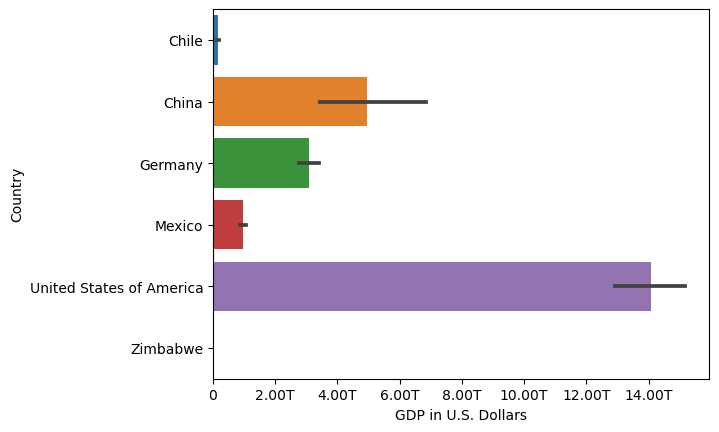

In [18]:
# compare GDP by country
ax = sns.barplot(x="GDP", y="Country", data=gdp_data)

# calls function to format GDP label in Trillions of Dollars
ax.xaxis.set_major_formatter(readable_numbers)
plt.xlabel('GDP in U.S. Dollars')


The highest GDP is from The United States, followed by China, Germany, Mexico, Chile, and Zimbabwe, to better understand how GDP has changed over time we can compare GDP for each country throughout the years.

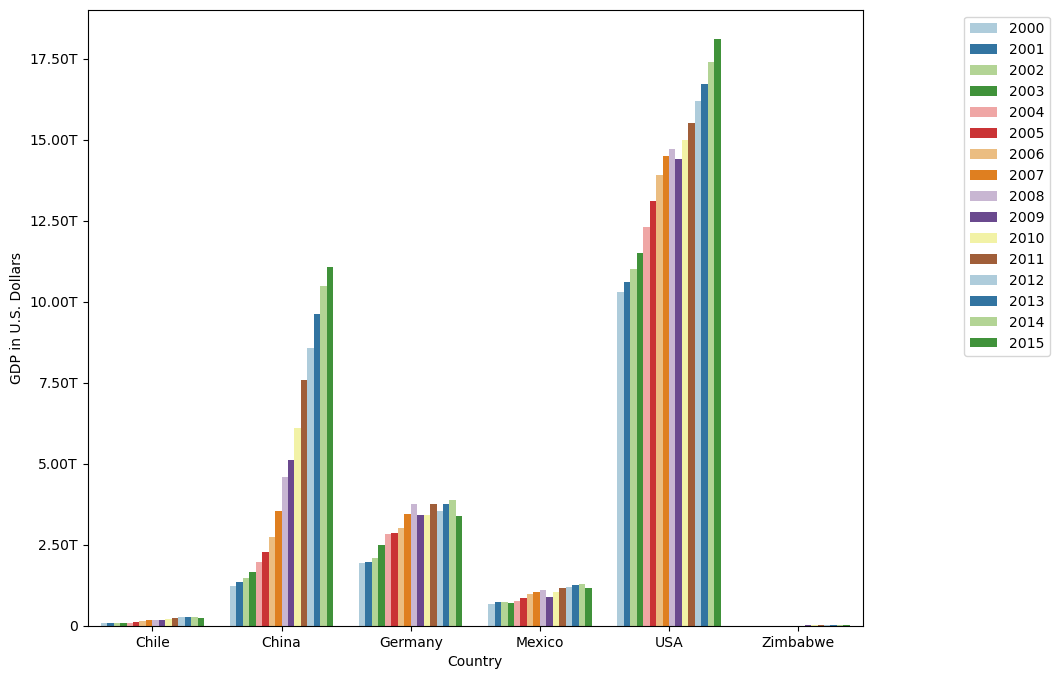

In [46]:
# compare GDP by country and year

#convert year to string to avoid errors in the plot
gdp_data['Year'] = gdp_data['Year'].astype(str)

# labels for X axis so they can be easier to read
labels=['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=gdp_data,
                 palette=sns.color_palette("Paired"))
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
# calls function to format GDP label in Trillions of Dollars
ax.yaxis.set_major_formatter(readable_numbers) 
plt.ylabel("GDP in U.S. Dollars")
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.show()

The United States has a higher GDP in average than any other country, the GDP of Zimbabwe is barely visible which shows their low GDP, to see the increase of GDP per Year we could explore GDP using a lineplot for each country and then compare the growth of each country against each other.

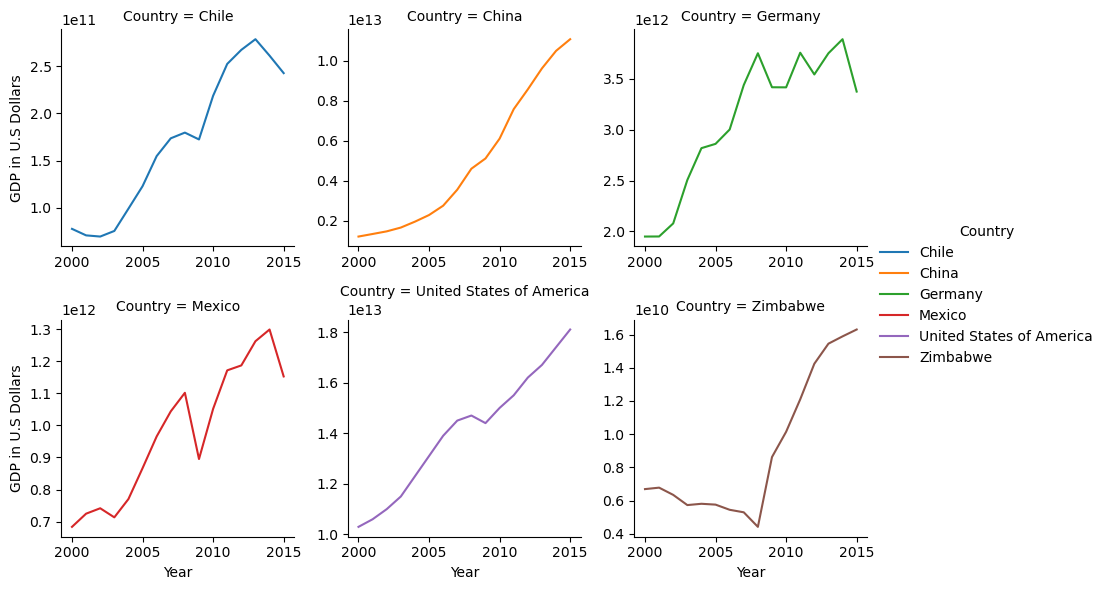

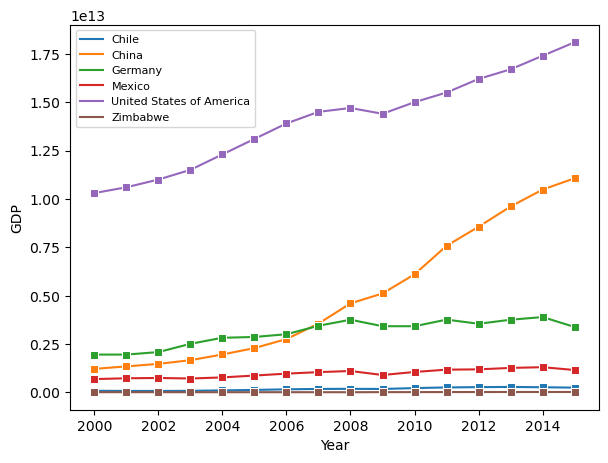

In [41]:

#convert year to int64, this is done to avoid the X label to be stacked
gdp_data['Year'] = gdp_data['Year'].astype('int64')

# ignore FutureWarnings from Seaborn library to avoid cluttering the output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# col_wrap=3 limits subplots in each row of the grid to 3.
# sharey=False and sharex=False arguments are NOT to share the y-axis and x-axis 
# scales between the subplots. 
graphGDP = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex=False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in U.S Dollars"))

# plot 2, GDP by country and year against each other
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=gdp_data, hue='Country', marker='s')
plt.legend(prop={'size': 8}, loc=2)
plt.show()


Based on the above grid and line plot, there is definitely an increase of GDP over the years, even for Zimbabwe. 

Now, after exploring GDP changes over the years for every country, we can take a look to how life expectancy has changed over the years in more detail.

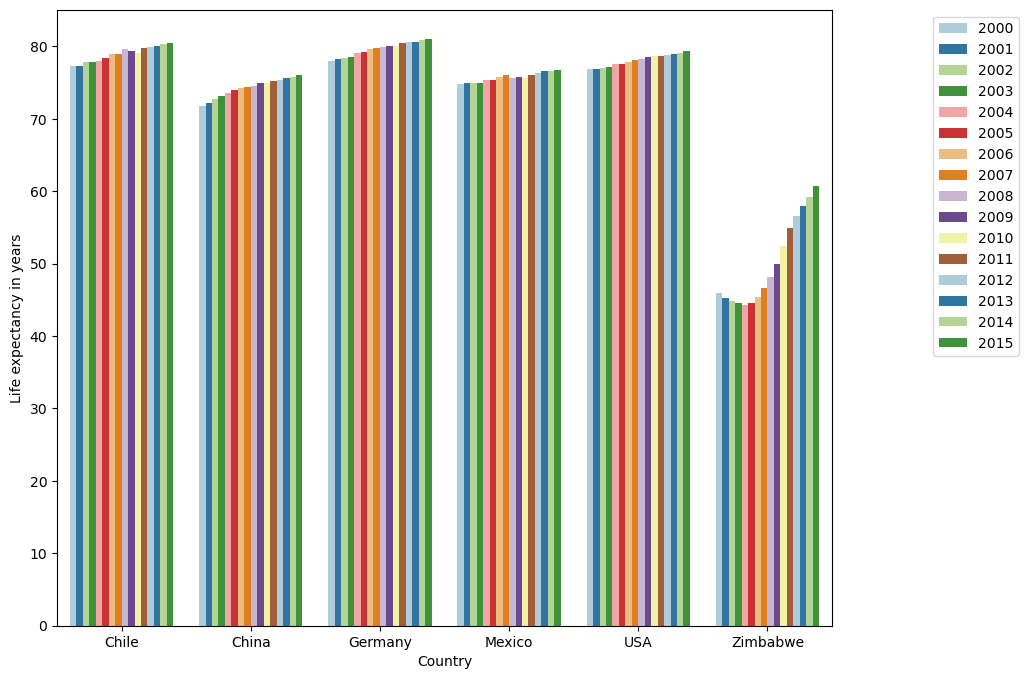

In [45]:
# labels for plot
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="Country", y="Life Expectancy", hue="Year", data=gdp_data, palette=sns.color_palette("Paired"))
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set(ylabel="Life expectancy in years")
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.show()

In the above graph we can observe that Zimbabwe has the lowest Life Expectancy over the years but it has been increasing, taking into account that Zimbabwe's GDP has also increased over the years, this, further confirms that Life Expectancy is positively correlated with GDP. To better visualize this we will use a line plot of Life expectancy for each country over the years.

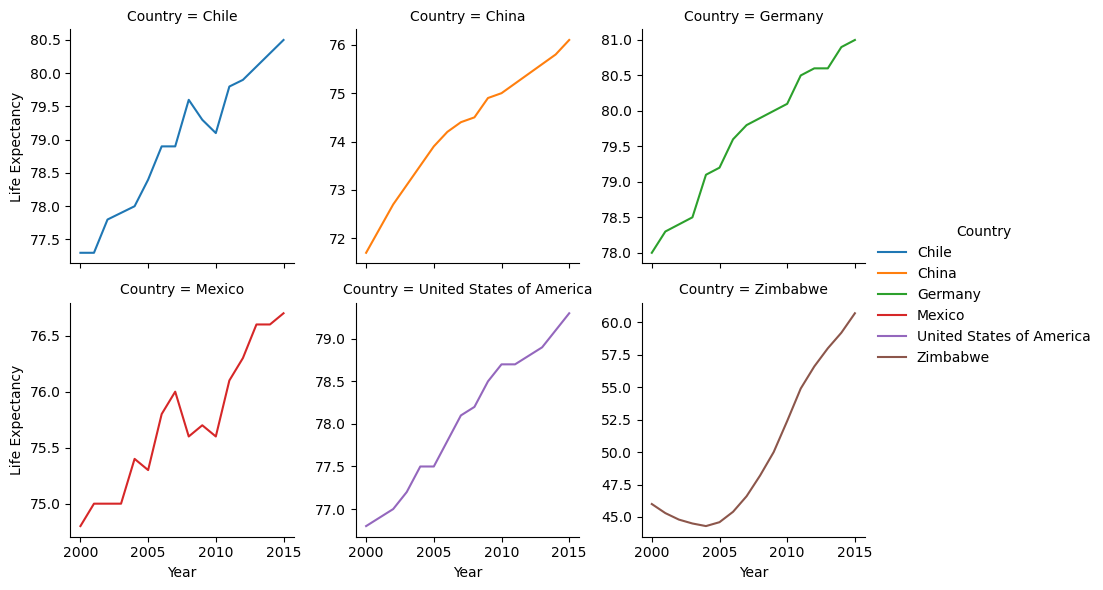

In [48]:
#convert year to int64, this is done to avoid the X label to be stacked
gdp_data['Year'] = gdp_data['Year'].astype('int64')

graphlife = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphlife = (graphlife.map(sns.lineplot,"Year","Life Expectancy")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy"))


### Conclusions


**This project seeks to answer some important questions:**
* Has life expectancy increased over time in the six nations?
  - Yes, life expectancy has increased over time in the six nations.
* Has GDP increased over time in the six nations?
  - GDP has increased in the six nations.
* Is there a correlation between GDP and life expectancy of a country?
  - There is definitely a positive correlation between GDP and life expectancy. 
* What is the average life expectancy in these nations?
  - For Zimbabwe the average life expectancy is 50 years, but increasing consistently, for the other 5 countries the life expectancy is between 70 to 80 years.
* What is the distribution of that life expectancy?
  - The distribution is left-skewed, this means that the majority of data points are at the right side.


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)